In [90]:
imports_path = ".\\imports.ipynb"
tableGAN_path = ".\\tableGAN.ipynb"
utils_path = ".\\utils.ipynb"

%run "$imports_path"

In [91]:
%run "$utils_path"
%run "$tableGAN_path"
%load_ext line_profiler
data= pd.read_csv('.\\df_adult_edited.csv')
data
data.dtypes

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education.Num      int64
Marital.Status    object
Occupation        object
Race              object
Sex               object
Capital.Gain       int64
Hours.per.week     int64
Country           object
Salary            object
dtype: object

In [4]:
n_epochs = 200
n_critic =10
adam_lr = 0.002
adam_beta1 = 0.5
model_dir = ".\\Model\\tableGAN_ckpt\\compare_adult\\"
noise_discrete_unif_max = 0.05

batch_size = 10000
ckpt_every = 1
loss_plot_update_every = 10

image_dir = ".\\Images"
retrain = False

In [5]:
tg = TableGAN(data, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1, 
              ckpt_dir = model_dir + "ref",
              quantile_transformation_int = False, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max)

tg_qt = TableGAN(data, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1, 
              ckpt_dir = model_dir + "qt",
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max)

tg_qtr = TableGAN(data, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1, 
              ckpt_dir = model_dir + "qtr",
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)

In [6]:
if retrain:
    fig_loss_adult, fig_time_plot = tg.train(n_epochs, batch_size = batch_size, ckpt_every = ckpt_every,
                                             restart_training = True, time_plot = True, 
                                             loss_plot_update_every = loss_plot_update_every)

In [7]:
if retrain:
    fig_loss_adult, fig_time_plot = tg_qt.train(n_epochs, batch_size = batch_size, ckpt_every = ckpt_every,
                                             restart_training = True, time_plot = True, 
                                             loss_plot_update_every = loss_plot_update_every)

In [8]:
if retrain:
    fig_loss_adult, fig_time_plot = tg_qtr.train(n_epochs, batch_size = batch_size, ckpt_every = ckpt_every,
                                             restart_training = True, time_plot = True, 
                                             loss_plot_update_every = loss_plot_update_every)

In [13]:
tg.restore_checkpoint()
tg_qt.restore_checkpoint()
tg_qtr.restore_checkpoint()

AssertionError: Unresolved object in checkpoint (root).discriminator_opt.iter: attributes {
  name: "VARIABLE_VALUE"
  full_name: "Adam/iter"
  checkpoint_key: "discriminator_opt/iter/.ATTRIBUTES/VARIABLE_VALUE"
}


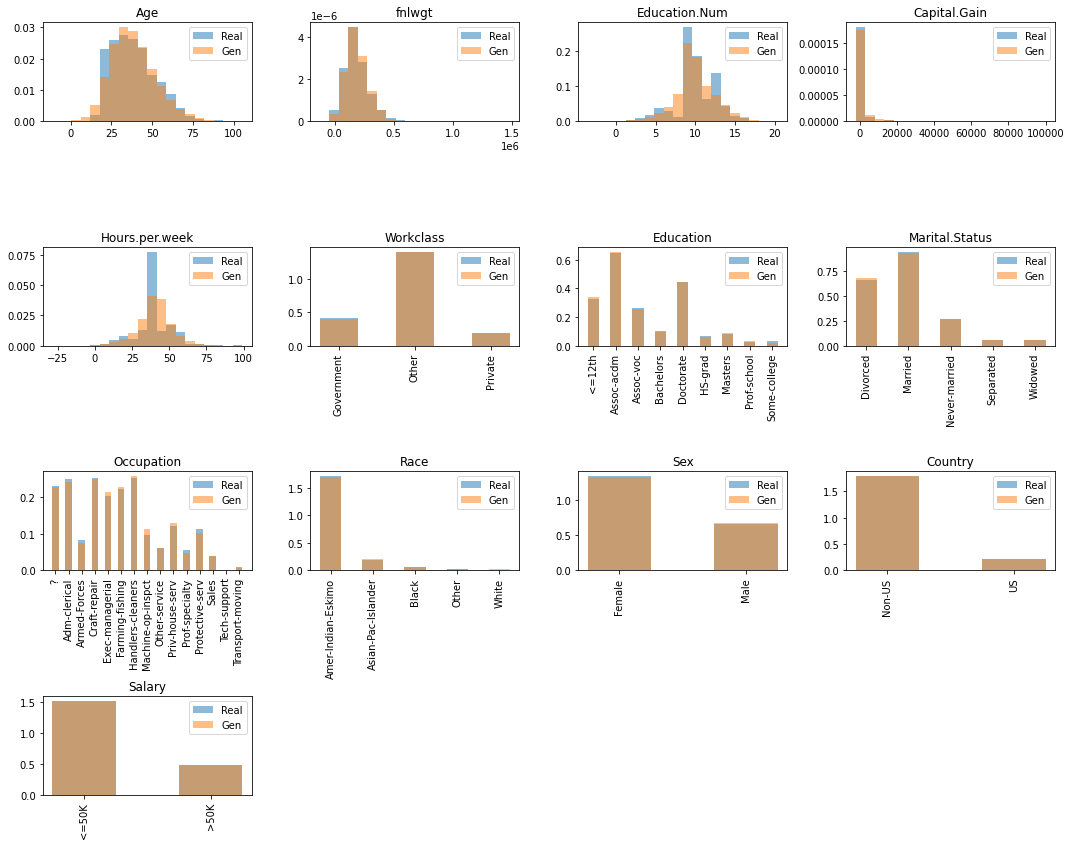

In [92]:
compare_hist_prefix = "comp_hist_"
image_type = ".jpg"
compare_hist_real_vs_generated(tg, discrete_xtick_rotation = 90, 
                               save_path = compare_hist_prefix + "ref" + image_type,
                              save_dir = image_dir)

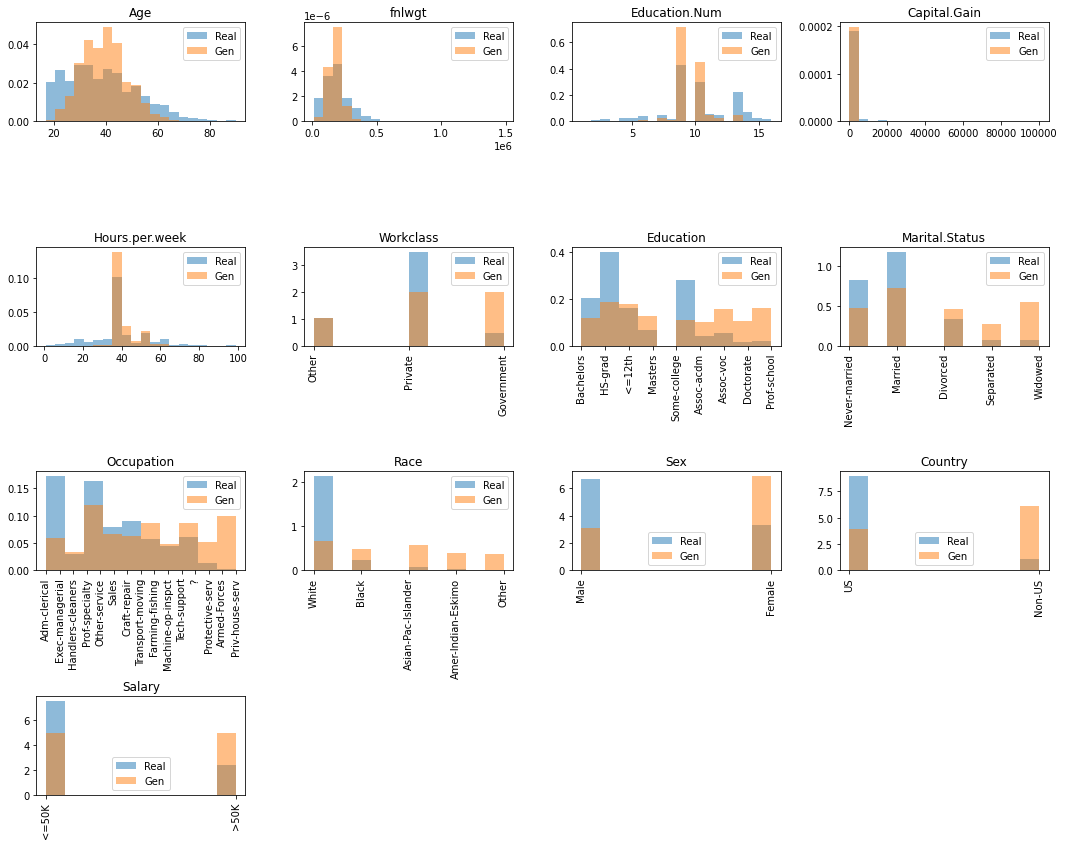

In [34]:
compare_hist_real_vs_generated(tg_qt, discrete_xtick_rotation = 90, 
                               save_path = compare_hist_prefix + "qt" + image_type,
                              save_dir = image_dir)

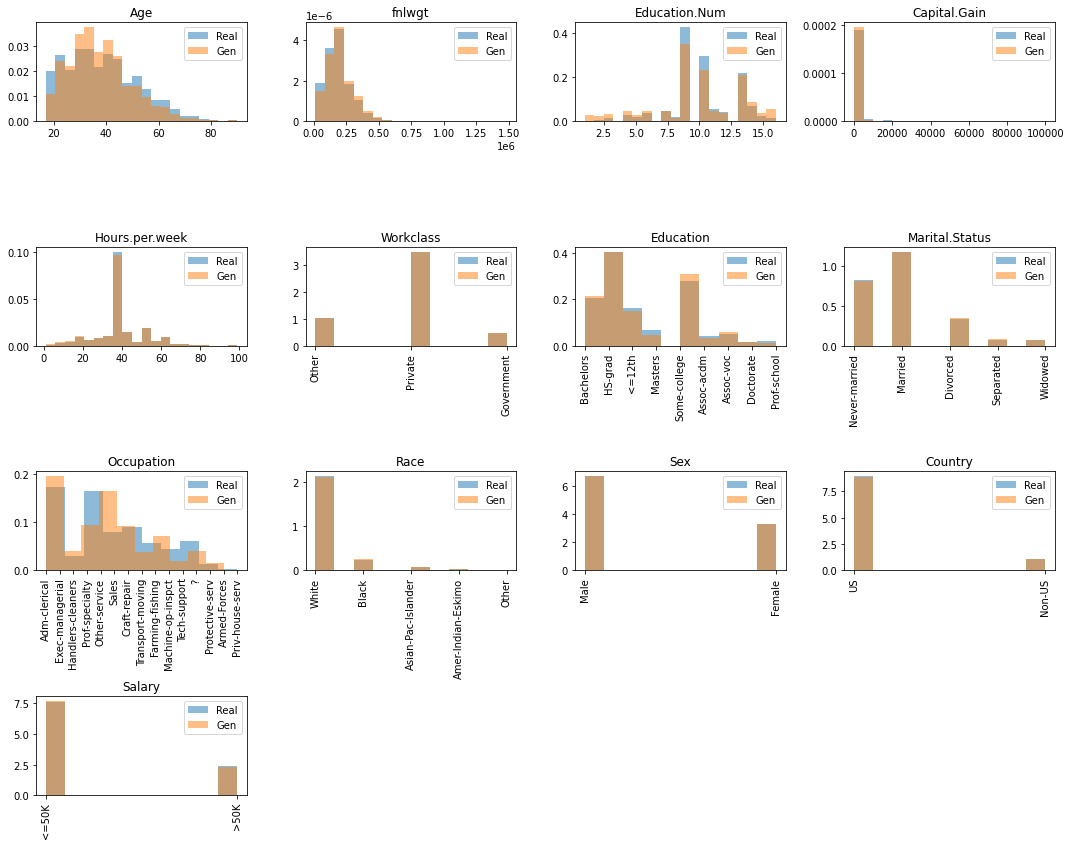

In [39]:
compare_hist_real_vs_generated(tg_qtr, discrete_xtick_rotation = 90, 
                               save_path = compare_hist_prefix + "qtr" + image_type,
                              save_dir = image_dir)

In [20]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer(epochs=10)
ctgan.fit(data, tg.columns_discrete)

   Age Workclass  fnlwgt    Education  Education.Num Marital.Status  \
0   61   Private   25488   Assoc-acdm             17       Divorced   
1   18   Private  121257    Bachelors             14        Widowed   
2   29   Private   92129  Prof-school              4        Married   
3   13   Private  243132      HS-grad             10      Separated   
4   27   Private  154562       <=12th              8       Divorced   

       Occupation   Race     Sex  Capital.Gain  Hours.per.week Country Salary  
0  Prof-specialty  White    Male           -54              40      US  <=50K  
1    Tech-support  Black    Male           129              35      US   >50K  
2  Prof-specialty  White  Female            -1              39      US  <=50K  
3               ?  White    Male           158              40      US  <=50K  
4  Prof-specialty  White    Male           -52              23      US  <=50K  


In [37]:
synthetic_data = ctgan.sample(tg.nrow)
?CTGANSynthesizer

[-0.25  0.25  0.75  1.25  1.75  2.25]
{'deg': 0, 'hei': 1, 'på': 2}


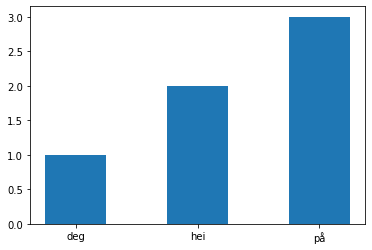

In [89]:
a = pd.Series(["hei", "på", "deg", "hei", "på", "på"])
dict_ = {s : i for i,s in enumerate(np.unique(a))}
bins = np.arange(0,3, 0.5)-0.25
print(bins)
print(dict_)
fig, ax = plt.subplots(1)
plt.hist(a.map(dict_), bins = bins)
ax.set_xticks(np.arange(0, 3))
ax.set_xticklabels(np.unique(a))
b = ["hei", "hei", "på", "deg"]

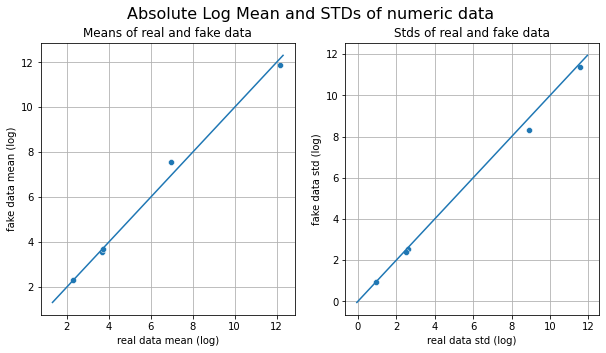

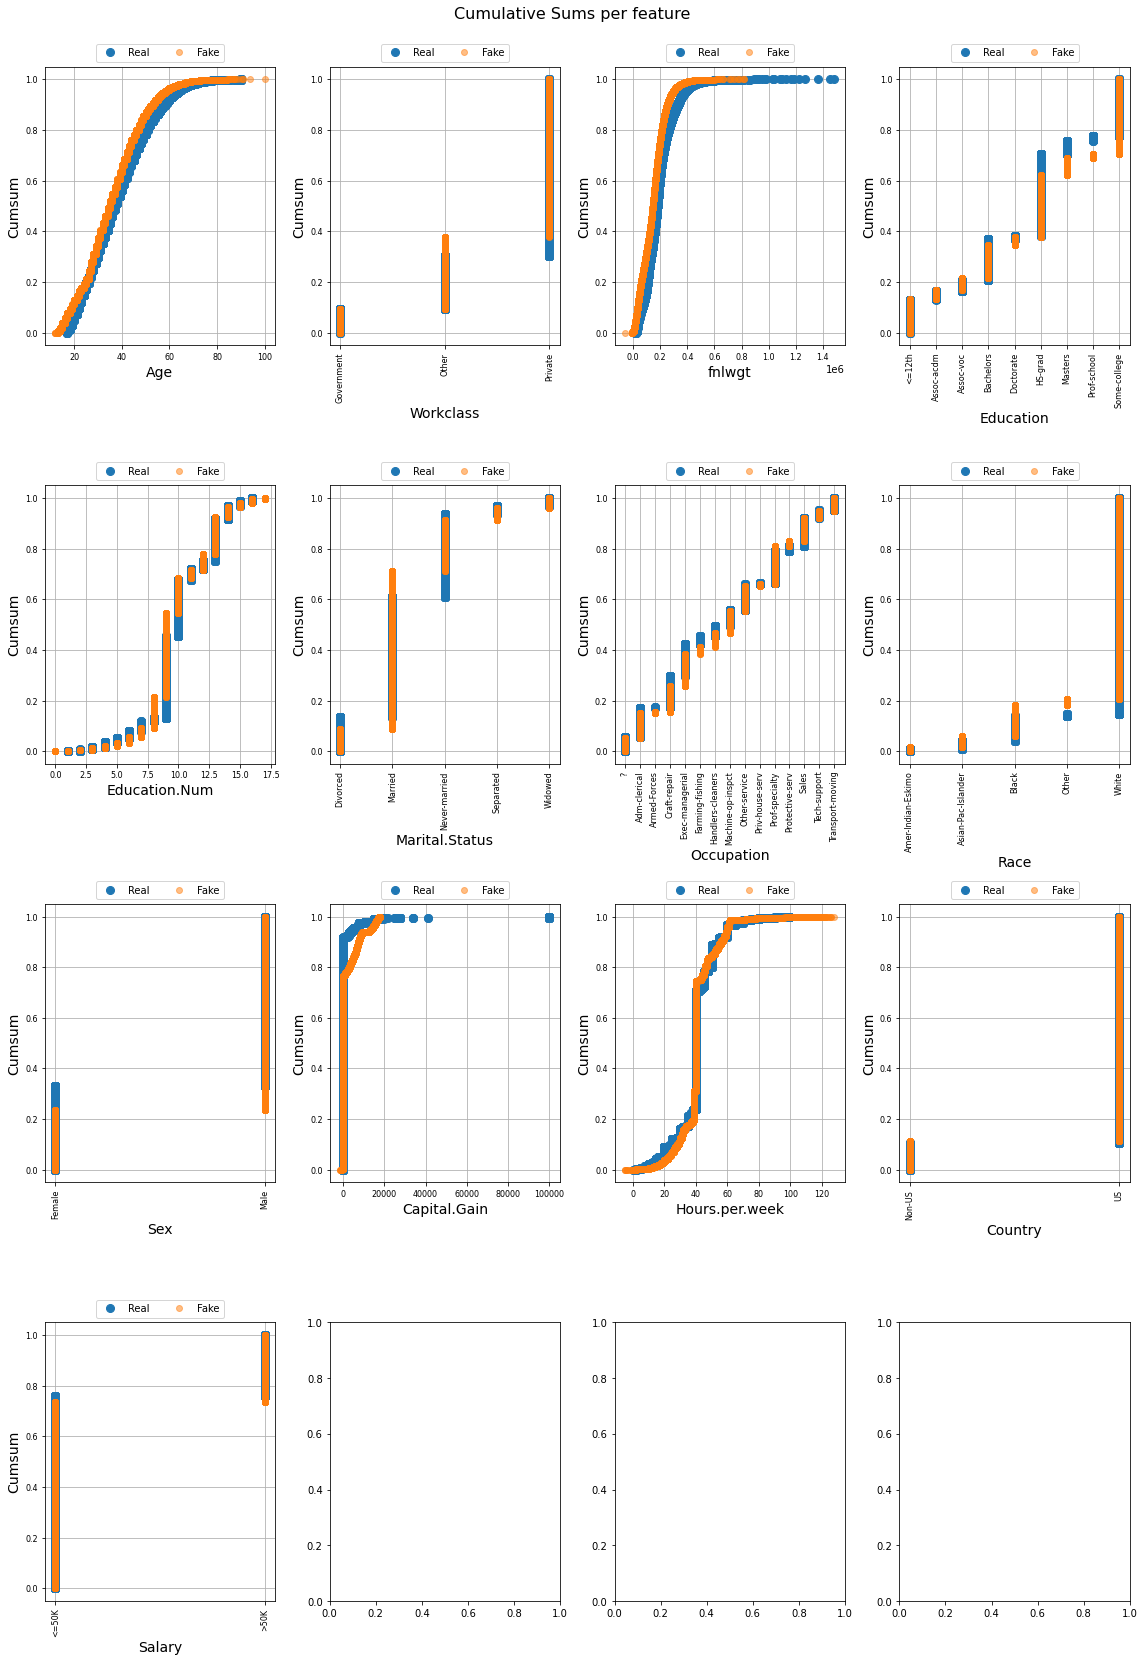

ValueError: cannot reindex from a duplicate axis

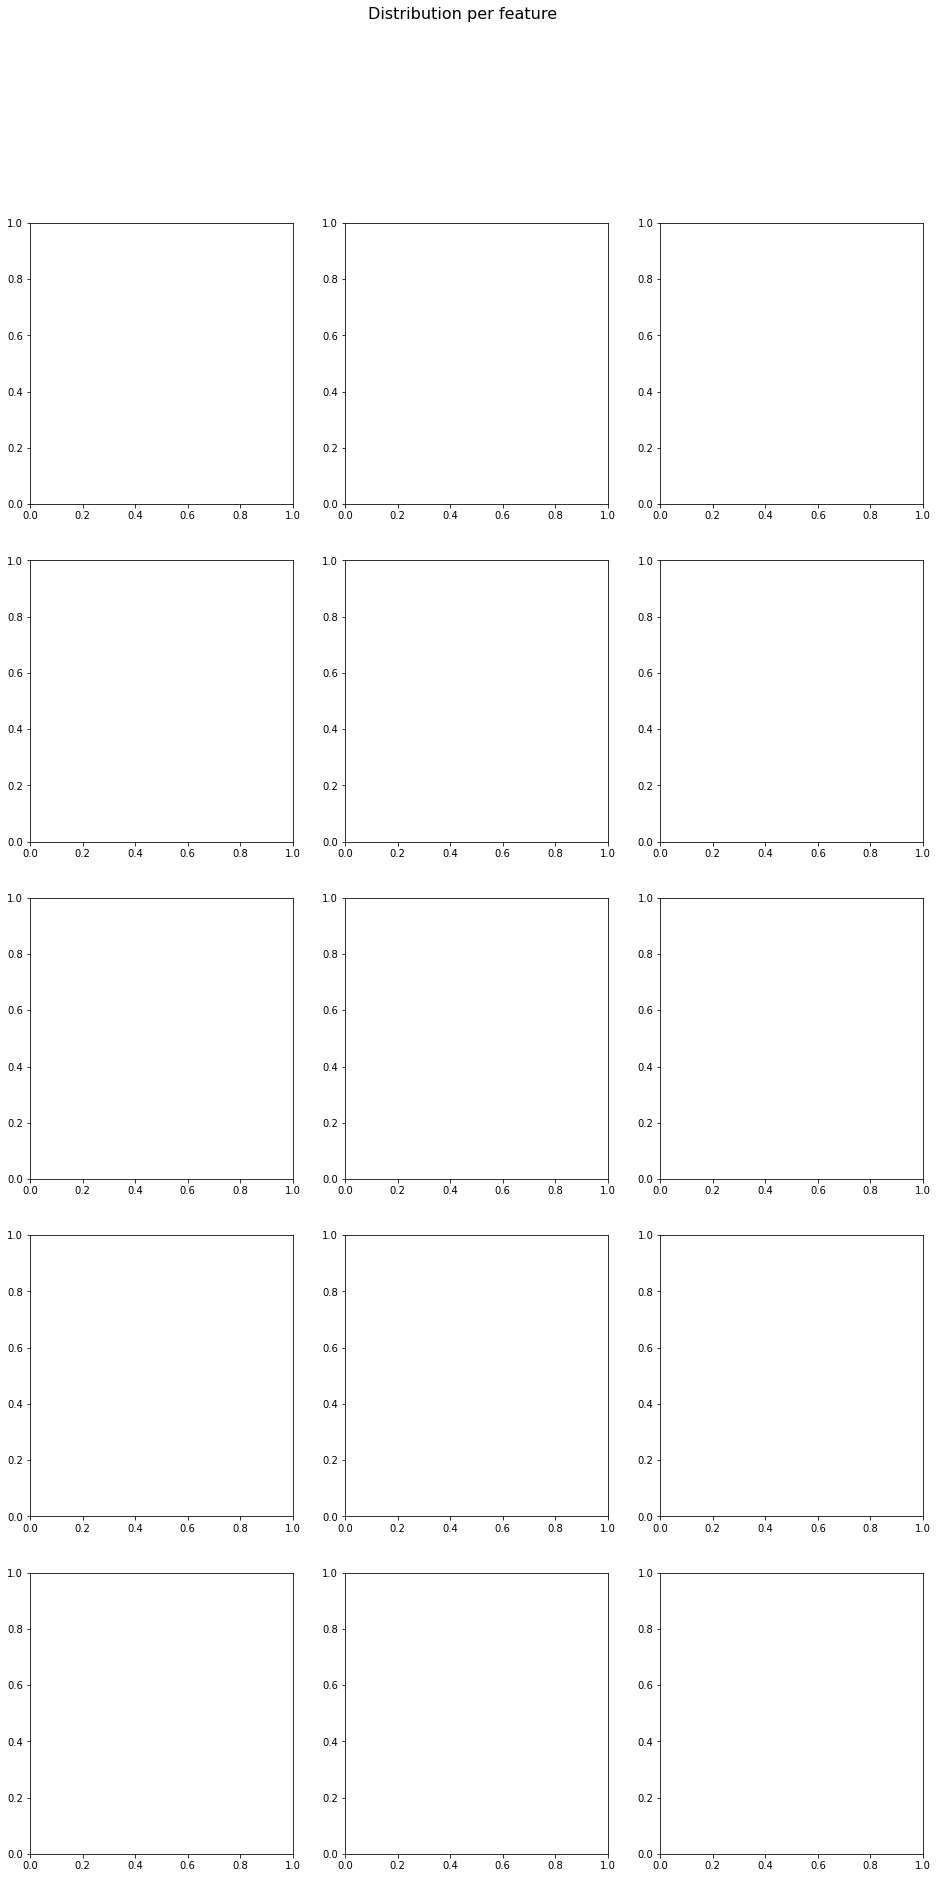

In [36]:

from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(data, synthetic_data)
table_evaluator.visual_evaluation()

['True dataset', 'tabGAN', 'tabGAN-qt', 'tabGAN-qtr']


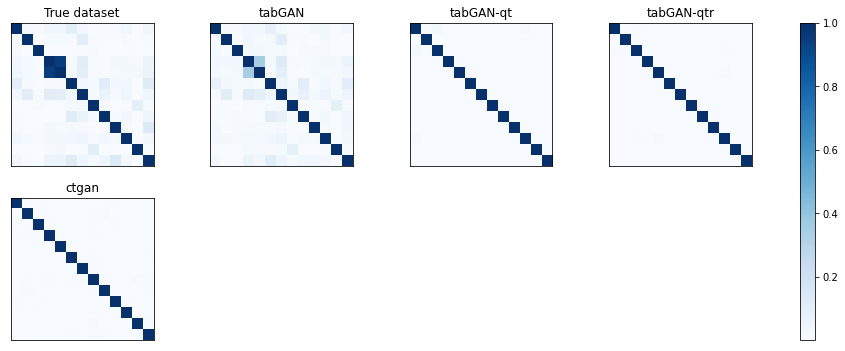

In [32]:
%run "$utils_path"
compare_nmi_matrices([tg, tg_qt, tg_qtr], extra_datasets = [synthetic_data],
                    ncol = 4, subplot_titles_tgans =  ["tabGAN", "tabGAN-qt", "tabGAN-qtr"],
                    subplot_titles_extra_datasets = ["ctgan"])